1. Provide posterior inference for a column of data with a `PyMC` ***normal-gamma specification***.

In [15]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (5).csv


In [17]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
pip install numpy pandas pymc3 seaborn


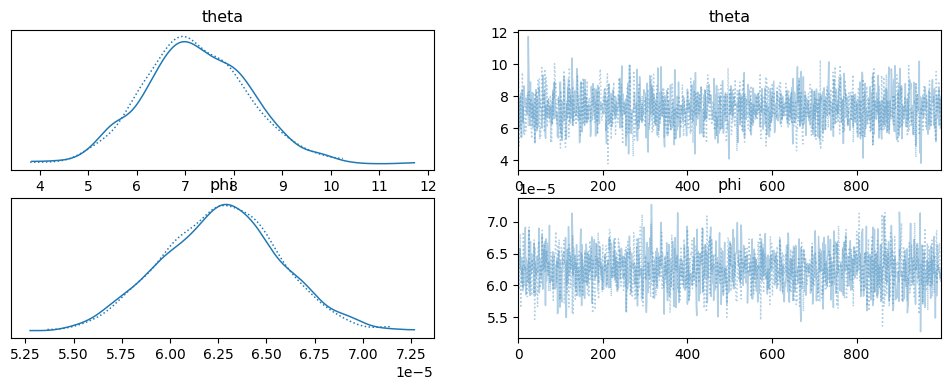

In [58]:
import arviz as az
import matplotlib.pyplot as plt

# let 'RestingBP' be the column of interest
data = df[['RestingBP']].dropna()

# PyMC3 Normal-Gamma Specification
with pm.Model() as model_normal_gamma:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=data['RestingBP'].values)

    # Sample
    trace_normal_gamma = pm.sample(1000, tune=1000)

az.plot_trace(trace_normal_gamma)
plt.show()


2. Find a different column of data for which a ***normal-gamma specification*** isn't justified.


    Column of interest: "Oldpeak"






3. Create a different `PyMC` specification that IS appropriate for this new data column "Oldpeak"

In [60]:
data = df[['Oldpeak']].dropna()

# PyMC3 Normal-Gamma Specification
with pm.Model() as model_normal_gamma:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=data['Oldpeak'].values)

    # Sample
    trace_normal_gamma = pm.sample(1000, tune=1000)


4. Provide posterior inference for the parameters of your new specification given the column of non-normal data
using `PyMC` and provide an analysis of the MCMC chains.

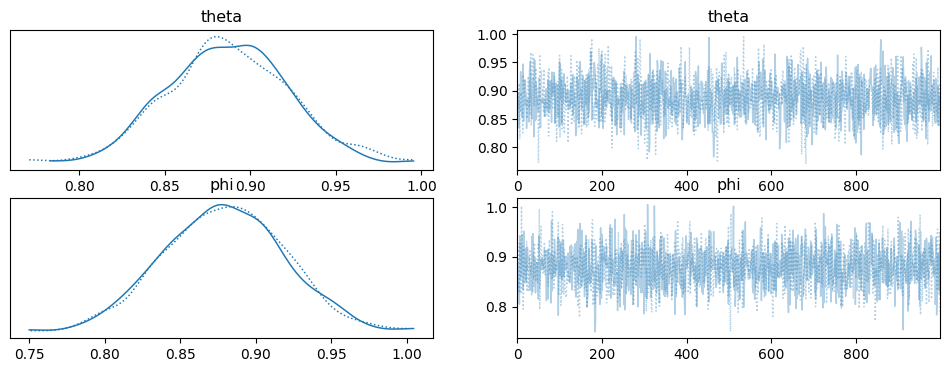

In [63]:
az.plot_trace(trace_normal_gamma)
plt.show()
